In [101]:
import sys
import os
import glob
import gc
from importlib import reload
import numpy as np
from pathlib import Path
from matplotlib.pyplot import *
%matplotlib inline

# from IPython.display import display, HTML
# display(HTML("<style>.container { width:97% !important; }</style>"))

from scipy.ndimage import gaussian_filter1d as gauss_filter
from scipy.signal import savgol_filter
from qubicpack.qubicfp import qubicfp
from qubic.lib.Calibration import Qfiber as ft
from qubic import time_constants_tools as tct

In [102]:
# base_dir = '/sps/qubic/Data/Calib-TD/'
# base_dir = '/media/nahue/files_hdd/heavy-data/'
# base_save_path = '/media/nahue/files_hdd/heavy-data'
# specific_save_folder = '/time_constants_results/all_TC_datasets_my_computer_2'
# save_path = base_save_path+specific_save_folder

# Path(save_path).mkdir( parents=True, exist_ok=True )
    
# print(save_path)

# base_dir = '/home/nahue/Downloads/'
# base_dir = '/home/nahue-ofi/heavy-data/'
base_dir = '/home/nahue-ofi/Nextcloud/time-constants/'
# base_dir = '/home/nahue-ofi/Downloads/'
# base_dir = '/media/nahue/files_hdd/heavy-data/'


In [103]:
days = ['2019-06-27','2019-07-03','2019-11-12','2019-11-14','2020-07-24','2020-07-25',
	'2020-07-27','2020-10-16','2020-11-12','2022-04-06','2022-08-18','2022-08-24',
	'2023-03-02','2023-03-07','2023-03-31','2023-04-03','2023-04-17','2023-05-24','2025-05-22']

keywords = ['*TimeCst*','*Fibers*','*New*'+'*TimeCstScript*','*TimeCstScript*','*TimeCstScript*',
	    '*TimeCstScript*','*TimeCstScript*','*TimeCstScript*','*carbonfibre*',
	    '*NoiseMeasurement_FileDuration_CalSourceON180*','*timeconstant_TimePerPos*','*TimeCstScript*',
	    '*calsource','*DomeOpen-Amp*','*CF-0*','*CFiber_square*','*carbon-fiber_0.2*','*__calsource*','*carbonfibre*']

fmods = [[0.25],[0.25],[0.6],[0.6],[0.6],[0.6],[0.6],[0.6],[0.8],[0.2],[None],[0.3],[0.2],
	 [0.2, 0.7],[0.6, 0.6, 0.2, 0.2],[0.2],[0.2],[None],[0.2]]

dcs = [[30],[33.33333],[33.33333],[33.33333],[33.33333],[33.33333],[33.33333],[33.33333],
       [33],[60],[None],[30],[66],[66, 66],[33, 66, 66, 66],[33],[33],[None],[50,33,33,33]]

In [104]:
numberday = -1
day = days[numberday]
keyword = keywords[numberday]

data_dir = base_dir + day + '/'
thedirs = np.sort(glob.glob(data_dir+keyword))

for j,thedir in enumerate(thedirs):
    print(j,thedir)

0 /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_13.20.04__dome-open-carbonfibre
1 /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_13.22.49__dome-open-carbonfibre
2 /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_13.24.59__dome-open-carbonfibre
3 /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_14.28.12__dome-open-carbonfibre


In [28]:
# len(keywords)

In [105]:
numfile = 2
thedatadir = thedirs[numfile]

print('\n')
print('We will analyze: {}'.format(thedatadir))
print('\n')

dataset_info = str.split(thedatadir,'/')[-1]

a = qubicfp()
a.assign_verbosity(0)
a.read_qubicstudio_dataset(thedatadir)

# calsource_dict = a.calsource_info()
# print(calsource_dict)
# print(calsource_dict['calsource'])
# print(calsource_dict['modulator'])
# print(calsource_dict['cf'])
# caltime, calsourcedata = a.calsource()



We will analyze: /home/nahue-ofi/Nextcloud/time-constants/2025-05-22/2025-05-22_13.24.59__dome-open-carbonfibre




True

In [30]:
# try:
#     fmod = calsource_dict['modulator']['frequency']
# except:
#     if len(fmods[numberday])>1:
#         fmod = fmods[numberday][numfile]
#     else:
#         fmod = fmods[numberday][0]

# period = 1/fmod
# nbins = 100

# tt1 = a.timeaxis(asic=1)
# tt2 = a.timeaxis(asic=2)
# tod1 = a.timeline_array(asic=1)
# tod2 = a.timeline_array(asic=2)

# tt1_ct = a.timeaxis(asic=1,axistype='computertime')
# tt2_ct = a.timeaxis(asic=2,axistype='computertime')
# tod1_ct = a.timeline_array(asic=1)
# tod2_ct = a.timeline_array(asic=2)

# tt, alltod = a.tod()

# tt_ct, alltod_ct = a.tod(axistype='computertime')

# print([tt1[0],tt2[0],tt1_ct[0],tt2_ct[0]])

# t_init = np.min([tt1[0],tt2[0],tt1_ct[0],tt2_ct[0]])

# print(t_init)

# force_sync = True

# if force_sync == True:
    
#     tt1 -= tt1[0]
#     tt2 -= tt2[0]
#     tt1_ct -= tt1_ct[0]
#     tt2_ct -= tt2_ct[0]
#     tt -= tt[0]
#     tt_ct -= tt_ct[0]

#     print([tt1[0],tt2[0],tt1_ct[0],tt2_ct[0]])

# else:

#     tt1 -= t_init
#     tt2 -= t_init
#     tt1_ct -= t_init
#     tt2_ct -= t_init
#     tt -= t_init
#     tt_ct -= t_init

#     print([tt1[0],tt2[0],tt1_ct[0],tt2_ct[0]])

In [31]:
# figure()
# plot(caltime, calsourcedata)

In [32]:
# highcut = 10 #Hz

# alltod_f = ft.filter_data(tt,alltod,highcut=highcut)
# tod1_f = ft.filter_data(tt1,tod1,highcut=highcut)
# tod2_f = ft.filter_data(tt2,tod2,highcut=highcut)
# tod1_ct_f = ft.filter_data(tt1_ct,tod1_ct,highcut=highcut)
# tod2_ct_f = ft.filter_data(tt2_ct,tod2_ct,highcut=highcut)

In [33]:
# figure(figsize=(8,4))

# title('Alltimelines\n Dataset: {}'.format(dataset_info))
# ylabel('ADU')
# xlabel('Time [s]')
# for i in range(128):
#     plot(tt1, tod1[i,:], 'k-',alpha=0.7)
#     plot(tt2, tod2[i,:], 'b-',alpha=0.7)
# grid()

In [34]:
# ## asic 1

# figure(figsize=(8,4))

# tesnum = 96

# if tesnum > 128:
#     asic = 2
#     tod_asic = tod2
#     tt_asic = tt2
#     tod_asic_ct = tod2_ct
#     tt_asic_ct = tt2_ct
    
# else:
#     asic = 1
#     tod_asic = tod1
#     tt_asic = tt1
#     tod_asic_ct = tod1_ct
#     tt_asic_ct = tt1_ct

# # title('TES #{} (ASIC = {}) \n Dataset: {}'.format(tesnum,asic,dataset_info))
# # xlabel('Time [s]')
# # ylabel('ADU voltage')
# # plot(tt,alltod[tesnum-1]-np.mean(alltod[tesnum-1]),'.',label='a.tod(\'pps\') TES #{} (ASIC {})'.format(tesnum,asic))
# # plot(tt_ct,alltod_ct[tesnum-1]-np.mean(alltod_ct[tesnum-1]),label='a.tod(\'computertime\') TES #{} (ASIC {})'.format(tesnum,asic))
# plot(tt_asic,tod_asic[tesnum-1 - (asic-1) * 128]-np.mean(tod_asic[tesnum-1 - (asic-1) * 128]),'.',label='ppstime TES {} ASIC{}'.format(tesnum,asic))
# plot(tt_asic_ct,tod_asic_ct[tesnum-1 - (asic-1) * 128]-np.mean(tod_asic_ct[tesnum-1 - (asic-1) * 128]),alpha=0.5,label='cputime TES {} ASIC{}'.format(tesnum,asic))
# # grid()
# # legend()
# # tight_layout



# # figure()

# # plot(tt,alltod_f[tesnum-1],'.')
# # plot(tt1,tod1_f[tesnum-1])
# # plot(tt1_ct,tod1_ct_f[tesnum-1])

# ## asic 2

# # figure(figsize = (8,4))

# tesnum = 203

# if tesnum > 128:
#     asic = 2
#     tod_asic = tod2
#     tt_asic = tt2
#     tod_asic_ct = tod2_ct
#     tt_asic_ct = tt2_ct
    
# else:
#     asic = 1
#     tod_asic = tod1
#     tt_asic = tt1
#     tod_asic_ct = tod1_ct
#     tt_asic_ct = tt1_ct


# title('Dataset: {}\n force_sync = {}'.format(dataset_info,force_sync))
# xlabel('Time [s]')
# ylabel('ADU voltage')
# # plot(tt,alltod[tesnum-1]-np.mean(alltod[tesnum-1]),'.',label='a.tod(\'pps\') TES #{} (ASIC {})'.format(tesnum,asic))
# # plot(tt_ct,alltod_ct[tesnum-1]-np.mean(alltod_ct[tesnum-1]),label='a.tod(\'computertime\') TES #{} (ASIC {})'.format(tesnum,asic))
# plot(tt_asic,tod_asic[tesnum-1 - (asic-1) * 128]-np.mean(tod_asic[tesnum-1 - (asic-1) * 128]),'.',label='ppstime TES {} ASIC{}'.format(tesnum,asic))
# plot(tt_asic_ct,tod_asic_ct[tesnum-1 - (asic-1) * 128]-np.mean(tod_asic_ct[tesnum-1 - (asic-1) * 128]),alpha=0.5,label='cputime TES {} ASIC{}'.format(tesnum,asic))
# xlim(-1,15)
# grid()
# legend(title='a.timeaxis()',loc='upper right')
# tight_layout

# # figure()

# # plot(tt,alltod_f[tesnum-1+128],'.')
# # plot(tt2,tod2_f[tesnum-1])
# # plot(tt2_ct,tod2_ct_f[tesnum-1])

In [35]:
# print('Using a.timeaxis()...')
# print('Initial ppstime difference (ASIC2 - ASIC1):', '{} ms'.format(1e3*(tt2[0]-tt1[0])))
# print('Initial computertime difference (ASIC2 - ASIC1):', '{} ms'.format(1e3*(tt2_ct[0]-tt1_ct[0])))
# print('Initial time difference (computertime - ppstime) for ASIC 1:', '{} ms'.format(1e3*(tt1_ct[0]-tt1[0])))
# print('Initial time difference (computertime - ppstime) for ASIC 2:', '{} ms'.format(1e3*(tt2_ct[0]-tt2[0])))

In [36]:
# folded, t_fold, folded_nonorm, newdata = ft.fold_data(tt, alltod, period, nbins, median=True, rebin=False, verbose=False)

# folded_ct, t_fold_ct, folded_nonorm_ct, newdata_ct = ft.fold_data(tt_ct, alltod_ct, period, nbins, median=True, rebin=False, verbose=False)

# folded1, t_fold1, folded_nonorm1, newdata1 = ft.fold_data(tt1, tod1, period, nbins, median=True, rebin=False, verbose=False)

# folded2, t_fold2, folded_nonorm2, newdata2 = ft.fold_data(tt2, tod2, period, nbins, median=True, rebin=False, verbose=False)

# folded1_ct, t_fold1_ct, folded_nonorm1_ct, newdata1_ct = ft.fold_data(tt1_ct, tod1_ct, period, nbins, median=True, rebin=False, verbose=False)

# folded2_ct, t_fold2_ct, folded_nonorm2_ct, newdata2_ct = ft.fold_data(tt2_ct, tod2_ct, period, nbins, median=True, rebin=False, verbose=False)

In [37]:
# figure(figsize=(8,4))

# title('Method: a.tod(\'pps\') \n Dataset: {}'.format(dataset_info))
# ylabel('Normalized folded data')
# xlabel('Time [s]')
# for i in range(128):
#     if i==0:
#         plot(t_fold, folded[i,:], 'k-',alpha=1,label='ASIC 1')
#         plot(t_fold, folded[i+128,:], 'b-',alpha=1,label='ASIC 2')        
#     plot(t_fold, folded[i,:], 'k-',alpha=0.1)
#     plot(t_fold, folded[i+128,:], 'b-',alpha=0.1)  
# ylim(-2.5,2.5)
# grid()
# legend()
# tight_layout

In [38]:
# figure(figsize=(8,4))

# title('Method: a.tod(\'computertime\') \n Dataset: {}'.format(dataset_info))
# ylabel('Normalized folded data')
# xlabel('Time [s]')
# for i in range(128):
#     if i==0:
#         plot(t_fold_ct, folded_ct[i,:], 'k-',alpha=1,label='ASIC 1')
#         plot(t_fold_ct, folded_ct[i+128,:], 'b-',alpha=1,label='ASIC 2')        
#     plot(t_fold_ct, folded_ct[i,:], 'k-',alpha=0.1)
#     plot(t_fold_ct, folded_ct[i+128,:], 'b-',alpha=0.1)
# ylim(-2.5,2.5)
# grid()
# legend()
# tight_layout

In [39]:
# figure(figsize=(8,4))

# title('Method: a.timeaxis() (latest qubicpack)\n Dataset: {}'.format(dataset_info))
# ylabel('Normalized folded data')
# xlabel('Time [s]')
# for i in range(128):
#     plot(t_fold1, folded1[i,:], 'k-',alpha=0.1)
#     plot(t_fold2, folded2[i,:], 'b-',alpha=0.1)
# ylim(-2.5,2.5)
# grid()

In [40]:
# figure(figsize=(8,4))

# title('Method: a.timeaxis(axistype=\'computertime\') (latest qubicpack)\n Dataset: {}'.format(dataset_info))
# ylabel('Normalized folded data')
# xlabel('Time [s]')
# for i in range(128):
#     plot(t_fold1_ct, folded1_ct[i,:], 'k-',alpha=0.1)
#     plot(t_fold2_ct, folded2_ct[i,:], 'b-',alpha=0.1)
# ylim(-2.5,2.5)
# grid()

In [106]:
def folding_data(t_folded,tod,nbins,median=False,dispersion=False):
    
    ok = np.isfinite(t_folded) * np.isfinite(tod)
    x = t_folded[ok]
    y = tod[ok]
    mini = np.min(x)
    maxi = np.max(x)
    xx = np.linspace(mini, maxi, nbins + 1)

    xmin = xx[0:nbins]
    xmax = xx[1:]
    yval = np.zeros(nbins)
    xc = np.zeros(nbins)
    dy = np.zeros(nbins)
    dx = np.zeros(nbins)
    nn = np.zeros(nbins)

    for i in np.arange(nbins):
        ok = (x > xmin[i]) & (x < xmax[i])
        newy = y[ok]
        nn[i] = len(newy)
        if median:
            yval[i] = np.median(y[ok])
        else:
            yval[i] = np.mean(y[ok])

        xc[i] = (xmax[i] + xmin[i]) / 2
        if dispersion==True:
            fact = 1
        else:
            fact = np.sqrt(len(y[ok]))
        dy[i] = np.std(y[ok]) / fact
        dx[i] = np.std(x[ok]) / fact

    ok = nn != 0

    xc = xc[ok]
    yval = yval[ok]
    dx = dx[ok]
    dy = dy[ok]
    folded = (yval - np.mean(yval)) / np.std(yval)
    folded_nonorm = (yval - np.mean(yval))
    dfolded = dy / np.std(yval)
    dfolded_nonorm = dy

    return xc, folded, folded_nonorm, dfolded, dfolded_nonorm

def simulate_squaremodulated_tod(modulation_frequency = 0.2, sampling_frequency = 150, nperiods = 140, exponential_pars = None, noise_level=1,slow_part=None):
    
    modulation_period = 1 / modulation_frequency
    sampling_period = 1 / sampling_frequency
    
    if exponential_pars is None:
        dutycycle = 66 #%
        risetime = 0.05 #s
        falltime = 0.1 #s
        t0 = 0.5 * modulation_period
        amplitude = 25000 #adu
        offset = 0 #adu
    else:
        try:
            dutycycle = exponential_pars[0] #%
            risetime = exponential_pars[1] #s
            falltime = exponential_pars[2] #s
            t0 = exponential_pars[3] * modulation_period
            amplitude = exponential_pars[4] #adu
            offset = exponential_pars[5] #adu
        except:
            raise Exception('Give exponetial_pars as an array with [dc (%),risetime (s), falltime (s), initial_time (fraction of the modulation_period),amplitude (ADU), offset (ADU)]')

    nsamples = int(sampling_frequency / modulation_frequency)

    tmin_period = 0 #s

    tmax_period = tmin_period + nsamples * sampling_period

    time_period = np.linspace(tmin_period,tmax_period,nsamples+1)

    ## exponential behaviour

    exponential_pars = [dutycycle/100,risetime,falltime,t0,amplitude,offset]

    exponential_signal_one_period = tct.simsig_asym(time_period,exponential_pars)

    exponential_signal = exponential_signal_one_period

    for i in np.arange(nperiods):
        exponential_signal = np.append(exponential_signal,exponential_signal_one_period[1:])

    #exponential_signal = np.tile(exponential_signal_one_period,nperiods)

    tmin = 0
    time = tmin + np.arange(len(exponential_signal)) * sampling_period

    ## noise

    noise = np.random.normal(0,noise_level * amplitude,len(exponential_signal))

    ## slowly varying behaviour (drift)

    if slow_part is None:
        slow_part = 1e-4 * amplitude * (time-np.max(time)/2)**2
    else:
        try:
            if len(slow_part)>=len(time):
                slow_part = slow_part[:len(time)]
            elif len(slow_part)<len(time):
                time = time[:len(slow_part)]
                exponential_signal = exponential_signal[:len(slow_part)]
                noise = noise[:len(slow_part)]
        except:
            print('Something wrong with the given slow_part array. Taking default')
            slow_part = 1e-4 * amplitude * (time-np.max(time)/2)**2

    ## final simulated tod

    simulated_tod = exponential_signal + noise + slow_part
    
    simulated_tod_noslowpart = exponential_signal + noise
    
    simulated_tod_just_exponential = exponential_signal
    
    return time, simulated_tod, simulated_tod_noslowpart, simulated_tod_just_exponential, time_period, exponential_signal_one_period

def baseline_subtraction(time, tod, period=None, conds=None):
    if period is not None:
        window_len = int(len(tod)*period/(time[-1]-time[0]))
        order = 0
    else:
        window_len = int(len(tod)/10)
        order = 4
        
    slowpart_tod = savgol_filter(tod, window_len, order)
    
    flat_tod = tod - slowpart_tod
    
    return flat_tod, slowpart_tod

Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

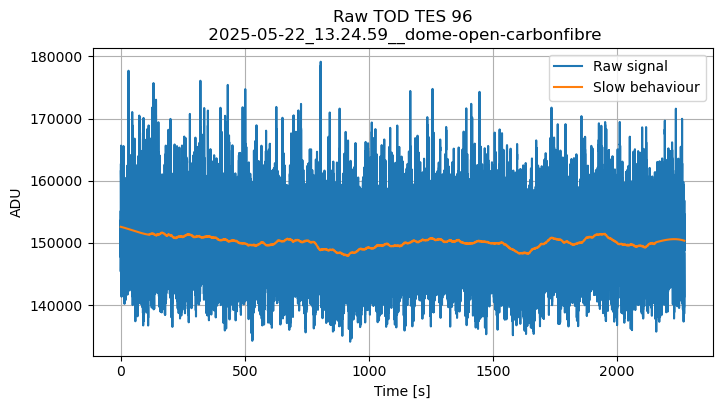

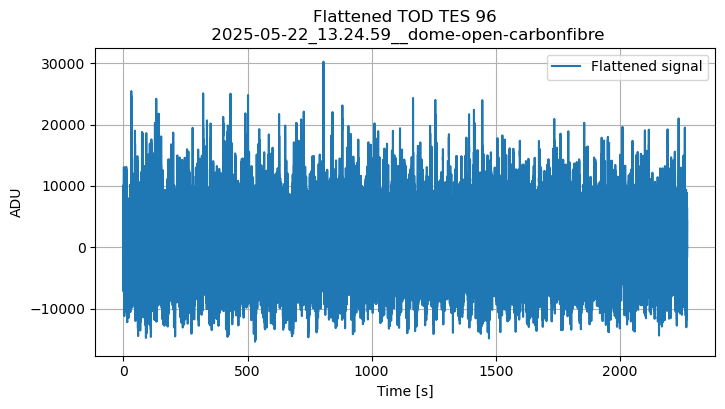

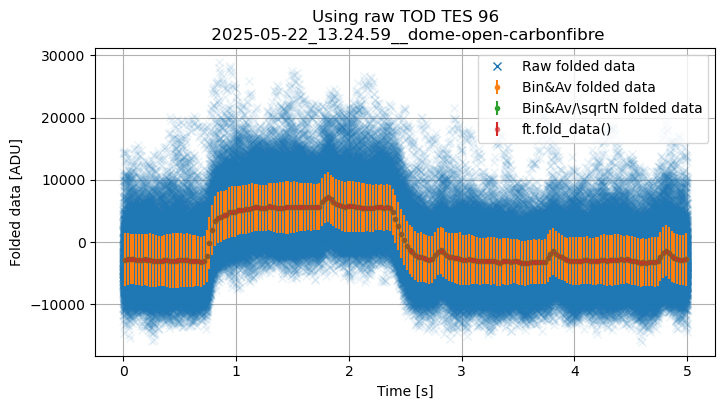

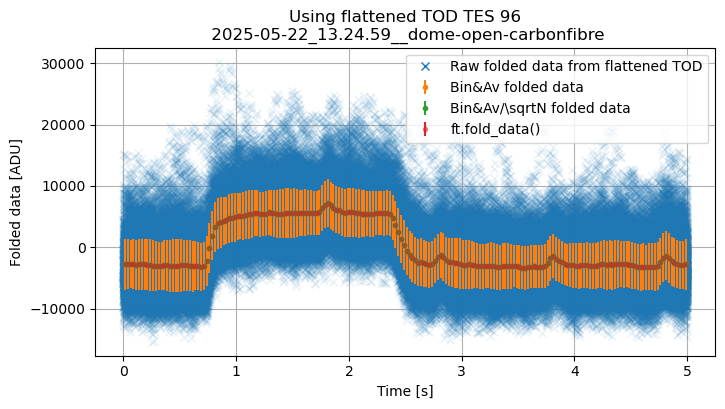

In [108]:
try:
    fmod = calsource_dict['modulator']['frequency']
except:
    if len(fmods[numberday])>1:
        fmod = fmods[numberday][numfile]
    else:
        fmod = fmods[numberday][0]

period = 1/fmod
nbins = 200

tt1 = a.timeaxis(asic=1)
tt2 = a.timeaxis(asic=2)
tod1 = a.timeline_array(asic=1)
tod2 = a.timeline_array(asic=2)

force_sync = False

if force_sync == True:
    
    tt1 -= tt1[0]
    tt2 -= tt2[0]

else:

    t_init = np.min([tt1[0],tt2[0]])

    tt1 -= t_init
    tt2 -= t_init

tesnum = 96

t_folded = tt1 % period

tod = tod1[tesnum-1]
slowpart_tod = savgol_filter(tod, int(len(tod)/10), 3)
flat_tod = tod-slowpart_tod

figure(figsize=(8,4))
title(f'Raw TOD TES {tesnum}\n {dataset_info}')
plot(tt1,tod,label='Raw signal')
# plot(tt1,smoothed_tod,label='Slow behaviour')
plot(tt1,slowpart_tod,label='Slow behaviour')
xlabel('Time [s]')
ylabel('ADU')
legend()
grid()
tight_layout

figure(figsize=(8,4))
title(f'Flattened TOD TES {tesnum}\n {dataset_info}')
plot(tt1,flat_tod,label='Flattened signal')
xlabel('Time [s]')
ylabel('ADU')
legend()
grid()
tight_layout

time_folded, folded_test, folded_nonorm_test, dfolded_test, dfolded_nonorm_test = folding_data(t_folded,tod,nbins)
time_folded_disp, folded_test_disp, folded_nonorm_test_disp, dfolded_test_disp, dfolded_nonorm_test_disp = folding_data(t_folded,tod,nbins,dispersion=True)

time_folded_flat, folded_testflat, folded_nonorm_testflat, dfolded_testflat, dfolded_nonorm_testflat = folding_data(t_folded,flat_tod,nbins)
time_folded_flat_disp, folded_testflat_disp, folded_nonorm_testflat_disp, dfolded_testflat_disp, dfolded_nonorm_testflat_disp = folding_data(t_folded,flat_tod,nbins,dispersion=True)

folded, t_fold, folded_nonorm, dfolded, dfolded_nonorm, newdata= ft.fold_data(tt1, np.reshape(tod, (1,len(tod))), period, nbins,
                                                                                     return_error=True)
folded = folded[0,:]
dfolded = dfolded[0,:]
folded_nonorm = folded_nonorm[0,:]
dfolded_nonorm = dfolded_nonorm[0,:]

folded_flat, t_fold_flat, folded_nonorm_flat, dfolded_flat, dfolded_nonorm_flat, newdata_flat= ft.fold_data(tt1, np.reshape(flat_tod, (1,len(flat_tod))), period, nbins,
                                                                                     return_error=True)
folded_flat = folded_flat[0,:]
dfolded_flat = dfolded_flat[0,:]
folded_nonorm_flat = folded_nonorm_flat[0,:]
dfolded_nonorm_flat = dfolded_nonorm_flat[0,:]


figure(figsize=(8,4))
title(f'Using raw TOD TES {tesnum}\n {dataset_info}')
plot(t_folded,tod-np.mean(tod),'x',alpha=0.1,label='Raw folded data')
errorbar(time_folded_disp,folded_nonorm_test_disp,yerr=dfolded_nonorm_test_disp,fmt='.',label='Bin&Av folded data')
errorbar(time_folded,folded_nonorm_test,yerr=dfolded_nonorm_test,fmt='.',label='Bin&Av/\sqrtN folded data')
errorbar(t_fold,folded_nonorm,yerr=dfolded_nonorm,fmt='.',label='ft.fold_data()',alpha=0.5)
xlabel('Time [s]')
ylabel('Folded data [ADU]')
leg = legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
grid()
tight_layout

figure(figsize=(8,4))
title(f'Using flattened TOD TES {tesnum}\n {dataset_info}')
plot(t_folded,flat_tod-np.mean(flat_tod),'x',alpha=0.1,label='Raw folded data from flattened TOD')
errorbar(time_folded_flat_disp,folded_nonorm_testflat_disp,yerr=dfolded_nonorm_testflat_disp,fmt='.', label='Bin&Av folded data')
errorbar(time_folded_flat,folded_nonorm_testflat,yerr=dfolded_nonorm_testflat,fmt='.', label='Bin&Av/\sqrtN folded data')
errorbar(t_fold_flat,folded_nonorm_flat,yerr=dfolded_nonorm_flat,fmt='.',alpha=0.5,label='ft.fold_data()')
xlabel('Time [s]')
ylabel('Folded data [ADU]')
leg = legend()
for lh in leg.legend_handles: 
    lh.set_alpha(1)
grid()
tight_layout

## Simulating an exponential signal

## Simulating an exponential signal

Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00
Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00


Detectors 100%[===================================================]Time: 0:00:00

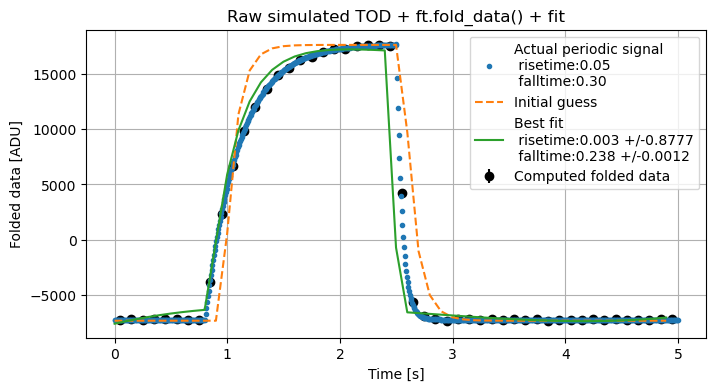

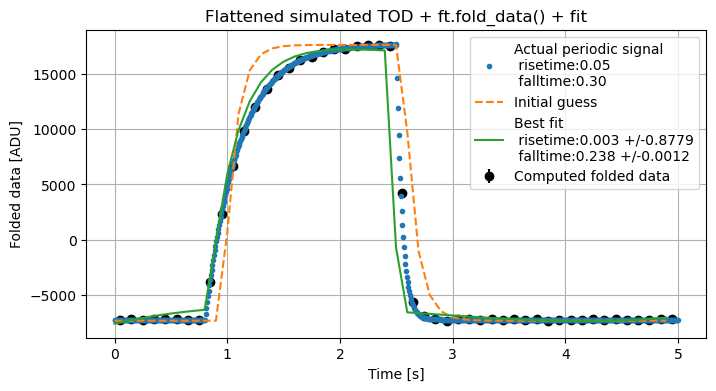

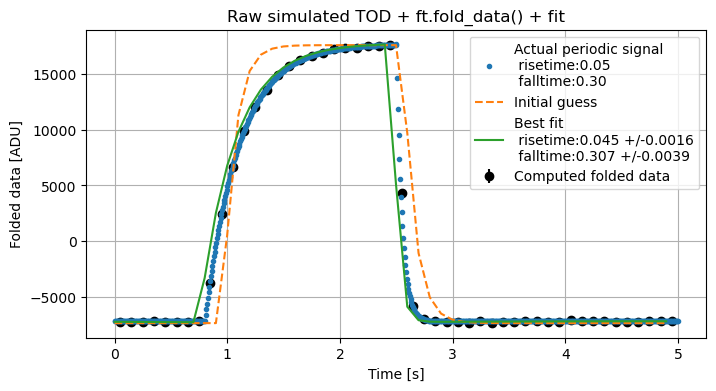

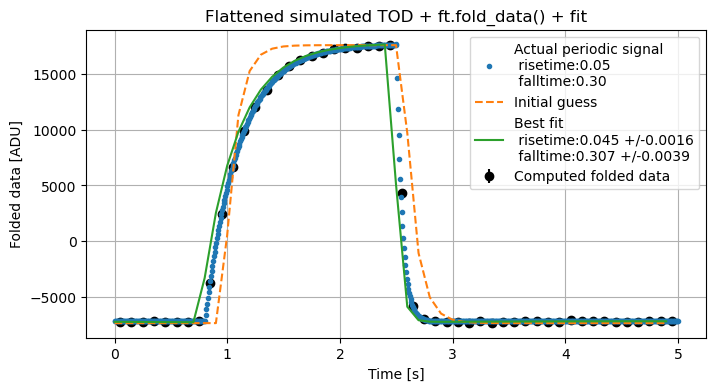

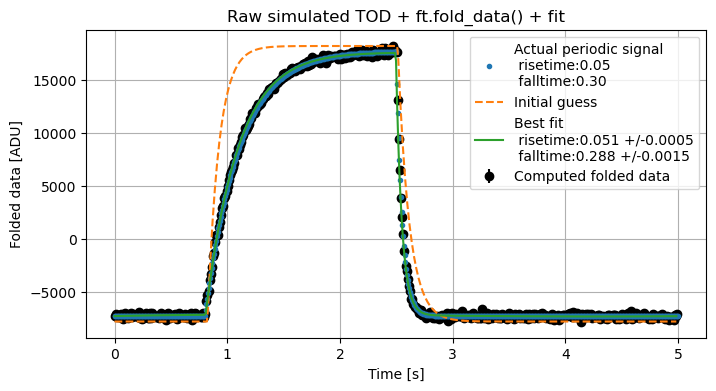

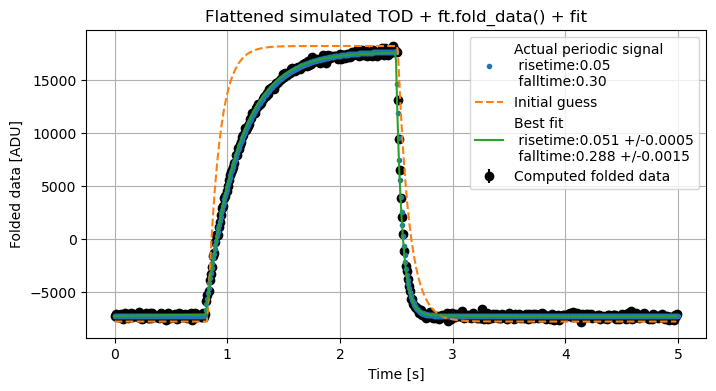

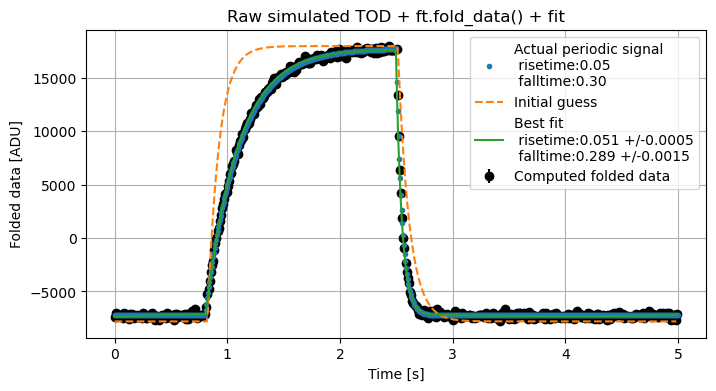

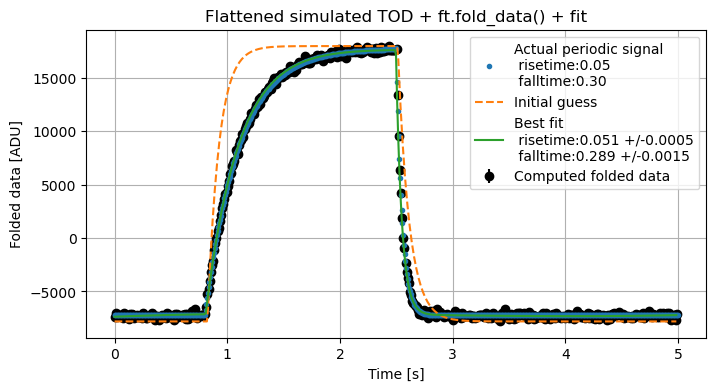

In [149]:
noise_level = 0.1
slow_part = 0*slowpart_tod
nperiods = 140
fmod = 0.2
period = 1/fmod
fsam = 150
dc = 66
dc = 66
risetime_par = 0.05
falltime_par = 0.3
t0 = 0.5
amplitude = 25000
offset = 0
exponential_pars = [dc, risetime_par, falltime_par, t0, amplitude, offset]

dutycycle = dc
risetime_guess = 0.1
falltime_guess = 0.1

## fit type

typefit = 'spl'
nparams_ext_spl = 4
nparams_ext_poly = 1

if typefit == 'spl':
### Instanciate timecst+spline object
    nparams_ext = nparams_ext_spl
    fctfit = tct.asymsig_spl_class(t, tofit, errors, nparams_ext)

elif typefit == 'poly':
### Instanciate timecst+polynomials object
    nparams_ext = nparams_ext_poly
    fctfit = tct.asymsig_poly

elif typefit == 'just_exp':
### Instanciate just timecst object
    nparams_ext = 0
    fctfit = tct.simsig_asym

nbins_array = [50,75,100,200,500]    
N = 100
doplot=True

risetime = np.zeros((N,len(nbins_array)))
riseerr = np.zeros((N,len(nbins_array)))
falltime = np.zeros((N,len(nbins_array)))
fallerr = np.zeros((N,len(nbins_array)))

risetime_flat = np.zeros((N,len(nbins_array)))
riseerr_flat = np.zeros((N,len(nbins_array)))
falltime_flat = np.zeros((N,len(nbins_array)))
fallerr_flat = np.zeros((N,len(nbins_array)))

for i_nbins, nbins in enumerate(nbins_array):
    for i in range(N):
        time, simulated_tod, simulated_tod_noslowpart, simulated_tod_just_exponential, time_period, exponential_signal_one_period = simulate_squaremodulated_tod(exponential_pars = exponential_pars, modulation_frequency=fmod, sampling_frequency=fsam, nperiods=nperiods,noise_level=noise_level,slow_part=slow_part)
    
        flat_simulated_tod, slowpart_simulated_tod = baseline_subtraction(time,simulated_tod,period=period)
    
    
        # figure(figsize=(8,4))
        # title(f'Simulated TOD with S/N = {1/noise_level}')
        # plot(time,simulated_tod,label='Simulated TOD')
        # plot(time, slowpart_simulated_tod,label='Slowly varying part')
        # xlabel('Time [s]')
        # ylabel('ADU')
        # legend()
        # grid()
        # tight_layout
    
        # figure(figsize=(8,4))
        # title('Flattened simulated TOD')
        # plot(time, flat_simulated_tod)
        # grid()
        # xlabel('Time [s]')
        # ylabel('ADU')
        # tight_layout
    
        # spectrum_st, freq_st = ft.power_spectrum(time, simulated_tod, rebin=True)
        # spectrum_fst, freq_fst = ft.power_spectrum(time, flat_simulated_tod, rebin=True)
    
        # figure(figsize=(8,4))
        # plot(freq_st, gauss_filter(spectrum_st,1),'.',label='Simulated TOD')
        # plot(freq_fst, gauss_filter(spectrum_fst,1),label='Flattened sim TOD')
        # yscale('log')
        # xscale('log')
        # xlabel('Frequency [Hz]')
        # ylabel('Smoothed PSD')
        # title('Simulated TOD')
        # grid()
        # legend()
    
        # figure(figsize=(8,4))
        # plot(freq_st, spectrum_st/spectrum_fst,'.',label='PSD(signal)/PSD(flatsignal)')
        # plot(freq_st, gauss_filter(spectrum_st,1)/gauss_filter(spectrum_fst,1),label='Smoothed PSD(signal)/PSD(flatsignal)')
        # yscale('log')
        # xscale('log')
        # xlabel('Frequency [Hz]')
        # ylabel('PSD ratio')
        # title('Simulated TOD')
        # grid()
        # legend()
    
        folded, t_fold, folded_nonorm, dfolded, dfolded_nonorm, newdata= ft.fold_data(time, np.reshape(simulated_tod, (1,len(simulated_tod))), period, nbins,
                                                                                             return_error=True)
        folded = folded[0,:]
        dfolded = dfolded[0,:]
        folded_nonorm = folded_nonorm[0,:]
        dfolded_nonorm = dfolded_nonorm[0,:]
    
        if doplot== True:
            if i==0 or i==N-1:
                if i_nbins==0 or nbins==nbins_array[-1]:
                    figure(figsize=(8,4))
                    errorbar(t_fold,folded_nonorm,yerr=dfolded_nonorm,fmt='ko',label='Computed folded data',zorder=2)
                    plot(time_period,exponential_signal_one_period-np.mean(exponential_signal_one_period),'.',zorder=3,label=f'Actual periodic signal \n risetime:{exponential_pars[1]:.2f} \n falltime:{exponential_pars[2]:.2f}')
                    title(f'Raw simulated TOD + ft.fold_data() + fit')
                    xlabel('Time [s]')
                    ylabel('Folded data [ADU]')
    
        ## to fit
        t = t_fold
        tofit = folded_nonorm
        errors = dfolded_nonorm
    
        guess, allguess = tct.get_best_initial_guess(tofit = tofit, t = t, nbins = nbins, dutycycle = dutycycle, risetime = risetime_guess, falltime = falltime_guess, nparams_ext = nparams_ext, typefit = typefit, fctfit = fctfit)
    
        limits = [[0,np.maximum(guess[0]-0.2,0.),guess[0]+0.2], [1,0., guess[1]*10],
                  [2,0., guess[2]*10], [3,guess[3]-period/2,guess[3]+period/2],
                  [4,-1.2*np.abs(guess[4]),1.2*np.abs(guess[4])],[5,np.min(tofit)-0.1*np.abs(guess[4]),np.max(tofit)+0.1*np.abs(guess[4])]]
    
        ### Fixed parameters
        fixpars = []
    
        m, ch2, ndf = tct.fit_one(t, tofit, errors, allguess, fctfit = fctfit, limits=limits, fixpars=fixpars)
    
        ch2vals_folded = ch2
        ndfvals_folded = ndf
        dcfit_folded = m.values[0]
        dcerr_folded = m.errors[0]
        risefit_folded = m.values[1]
        riseerr_folded = m.errors[1]
        fallfit_folded = m.values[2]
        fallerr_folded = m.errors[2]
        t0fit_folded = m.values[3]
        t0err_folded = m.errors[3]
        ampfit_folded = m.values[4]
        amperr_folded = m.errors[4]
        validfit_folded = m.valid
        allpars_folded = np.array(m.values)
        allerrs_folded = np.array(m.errors)

        if doplot== True:
            if i==0 or i==N-1:
                if i_nbins==0 or nbins==nbins_array[-1]:   
                    plot(t_fold,fctfit(t_fold,allguess),'--',label='Initial guess',zorder=4)
                    plot(t_fold,fctfit(t_fold,allpars_folded),zorder=5,label = f'Best fit\n risetime:{risefit_folded:.3f} +/-{riseerr_folded:.4f}\n falltime:{fallfit_folded:.3f} +/-{fallerr_folded:.4f}')
                
                    legend()
                    grid()
                    tight_layout
    
        risetime[i,i_nbins] = risefit_folded
        riseerr[i,i_nbins] = riseerr_folded
        falltime[i,i_nbins] = fallfit_folded
        fallerr[i,i_nbins] = fallerr_folded
    
        ### for flattened simulated tod
    
        folded, t_fold, folded_nonorm, dfolded, dfolded_nonorm, newdata= ft.fold_data(time, np.reshape(flat_simulated_tod, (1,len(flat_simulated_tod))), period, nbins,
                                                                                             return_error=True)
        folded = folded[0,:]
        dfolded = dfolded[0,:]
        folded_nonorm = folded_nonorm[0,:]
        dfolded_nonorm = dfolded_nonorm[0,:]

        if doplot== True:
            if i==0 or i==N-1:
                if i_nbins==0 or nbins==nbins_array[-1]:
                    figure(figsize=(8,4))
                    errorbar(t_fold,folded_nonorm,yerr=dfolded_nonorm,fmt='ko',label='Computed folded data',zorder=2)
                    plot(time_period,exponential_signal_one_period-np.mean(exponential_signal_one_period),'.',zorder=3,label=f'Actual periodic signal \n risetime:{exponential_pars[1]:.2f} \n falltime:{exponential_pars[2]:.2f}')
                    title(f'Flattened simulated TOD + ft.fold_data() + fit')
                    xlabel('Time [s]')
                    ylabel('Folded data [ADU]')
    
        ## to fit
        t = t_fold
        tofit = folded_nonorm
        errors = dfolded_nonorm
    
        ## same type fit and cd, rt, ft guess than before
    
        guess, allguess = tct.get_best_initial_guess(tofit = tofit, t = t, nbins = nbins, dutycycle = dutycycle, risetime = risetime_guess, falltime = falltime_guess, nparams_ext = nparams_ext, typefit = typefit, fctfit = fctfit)
    
        limits = [[0,np.maximum(guess[0]-0.2,0.),guess[0]+0.2], [1,0., guess[1]*10],
                  [2,0., guess[2]*10], [3,guess[3]-period/2,guess[3]+period/2],
                  [4,-1.2*np.abs(guess[4]),1.2*np.abs(guess[4])],[5,np.min(tofit)-0.1*np.abs(guess[4]),np.max(tofit)+0.1*np.abs(guess[4])]]
    
        ### Fixed parameters
        # fixpars = [1,0,0,0,0,0]
        fixpars = []
    
        m, ch2, ndf = tct.fit_one(t, tofit, errors, allguess, fctfit = fctfit, limits=limits, fixpars=fixpars)
    
        ch2vals_folded = ch2
        ndfvals_folded = ndf
        dcfit_folded = m.values[0]
        dcerr_folded = m.errors[0]
        risefit_folded = m.values[1]
        riseerr_folded = m.errors[1]
        fallfit_folded = m.values[2]
        fallerr_folded = m.errors[2]
        t0fit_folded = m.values[3]
        t0err_folded = m.errors[3]
        ampfit_folded = m.values[4]
        amperr_folded = m.errors[4]
        validfit_folded = m.valid
        allpars_folded = np.array(m.values)
        allerrs_folded = np.array(m.errors)

        if doplot== True:
            if i==0 or i==N-1:
                if i_nbins==0 or nbins==nbins_array[-1]:
                    plot(t_fold,fctfit(t_fold,allguess),'--',label='Initial guess',zorder=4)
                    plot(t_fold,fctfit(t_fold,allpars_folded),zorder=5,label = f'Best fit\n risetime:{risefit_folded:.3f} +/-{riseerr_folded:.4f}\n falltime:{fallfit_folded:.3f} +/-{fallerr_folded:.4f}')
                
                    legend()
                    grid()
                    tight_layout
    
        risetime_flat[i,i_nbins] = risefit_folded
        riseerr_flat[i,i_nbins] = riseerr_folded
        falltime_flat[i,i_nbins] = fallfit_folded
        fallerr_flat[i,i_nbins] = fallerr_folded
    

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

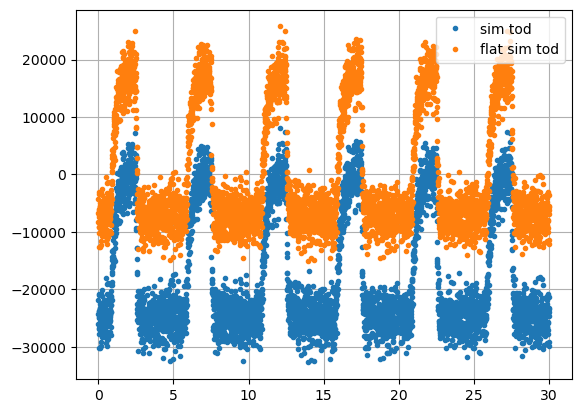

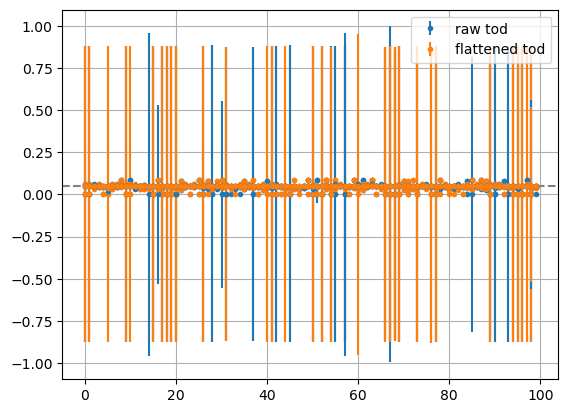

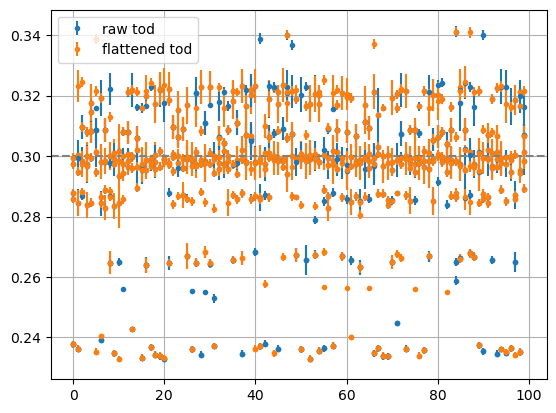

In [150]:
figure(0)
time_limit = 30
plot(time[time<time_limit],simulated_tod[time<time_limit],'.',label='sim tod')
plot(time[time<time_limit],flat_simulated_tod[time<time_limit],'.',label='flat sim tod')
# errorbar(np.arange(N),risetime_flat,yerr=riseerr_flat,fmt='.',label='flattened tod')
# axhline(risetime_par,linestyle='--',color='gray')
grid()
legend()
tight_layout

for i_nbins,nbins in enumerate(nbins_array):
    figure(1)
    if i_nbins==0:
        errorbar(np.arange(N),risetime[:,i_nbins],yerr=riseerr[:,i_nbins],fmt='.',color='C0',label='raw tod')
        errorbar(np.arange(N),risetime_flat[:,i_nbins],yerr=riseerr_flat[:,i_nbins],fmt='.',color='C1',label='flattened tod')
    errorbar(np.arange(N),risetime[:,i_nbins],yerr=riseerr[:,i_nbins],fmt='.',color='C0')
    errorbar(np.arange(N),risetime_flat[:,i_nbins],yerr=riseerr_flat[:,i_nbins],fmt='.',color='C1')

    
    figure(2)
    if i_nbins==0:
        errorbar(np.arange(N),falltime[:,i_nbins],yerr=fallerr[:,i_nbins],fmt='.',color='C0',label='raw tod')
        errorbar(np.arange(N),falltime_flat[:,i_nbins],yerr=fallerr_flat[:,i_nbins],fmt='.',color='C1',label='flattened tod')
    errorbar(np.arange(N),falltime[:,i_nbins],yerr=fallerr[:,i_nbins],fmt='.',color='C0')
    errorbar(np.arange(N),falltime_flat[:,i_nbins],yerr=fallerr_flat[:,i_nbins],fmt='.',color='C1')


figure(1)
axhline(risetime_par,linestyle='--',color='gray')
grid()
legend()
tight_layout

figure(2)
axhline(falltime_par,linestyle='--',color='gray')
grid()
legend()
tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

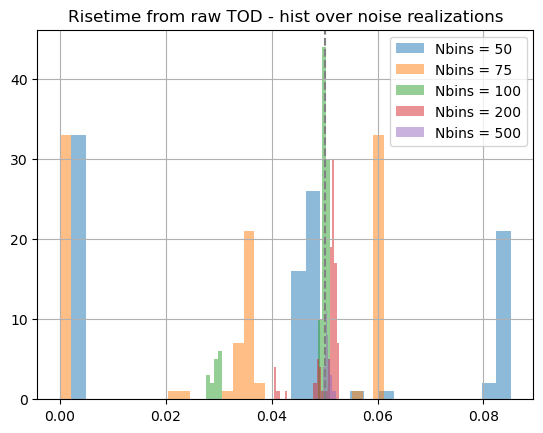

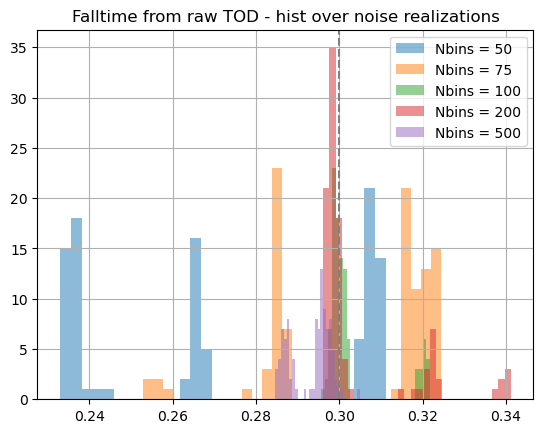

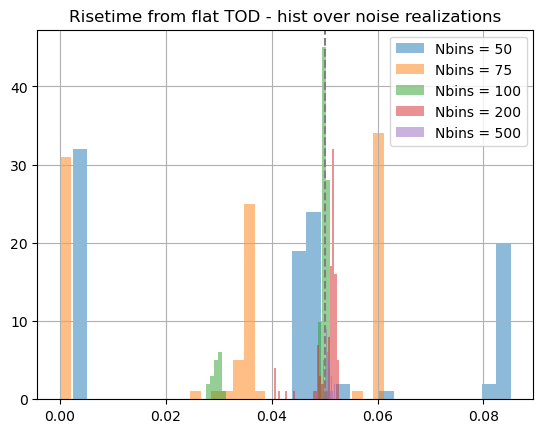

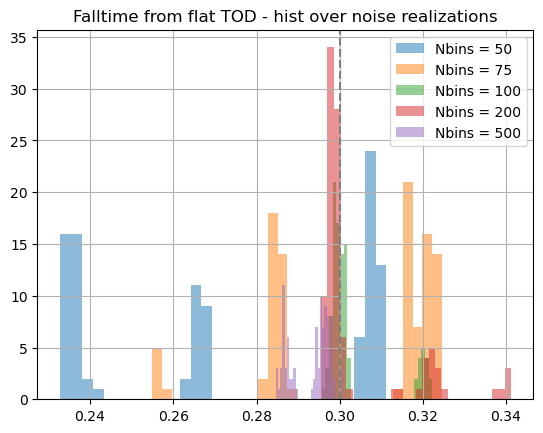

In [159]:
figure()
for i_nbins,nbins in enumerate(nbins_array):
    # hist_bins = 
    hist(risetime[:,i_nbins],30,alpha=0.5,label=f'Nbins = {nbins}')

axvline(risetime_par,linestyle='--',color='gray')
title('Risetime from raw TOD - hist over noise realizations')
grid()
legend()
tight_layout

figure()
for i_nbins,nbins in enumerate(nbins_array):
    hist(falltime[:,i_nbins],30,alpha=0.5,label=f'Nbins = {nbins}')

axvline(falltime_par,linestyle='--',color='gray')
title('Falltime from raw TOD - hist over noise realizations')
grid()
legend()
tight_layout

figure()
for i_nbins,nbins in enumerate(nbins_array):
    # hist_bins = 
    hist(risetime_flat[:,i_nbins],30,alpha=0.5,label=f'Nbins = {nbins}')

axvline(risetime_par,linestyle='--',color='gray')
title('Risetime from flat TOD - hist over noise realizations')
grid()
legend()
tight_layout

figure()
for i_nbins,nbins in enumerate(nbins_array):
    hist(falltime_flat[:,i_nbins],30,alpha=0.5,label=f'Nbins = {nbins}')

axvline(falltime_par,linestyle='--',color='gray')
title('Falltime from flat TOD - hist over noise realizations')
grid()
legend()
tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

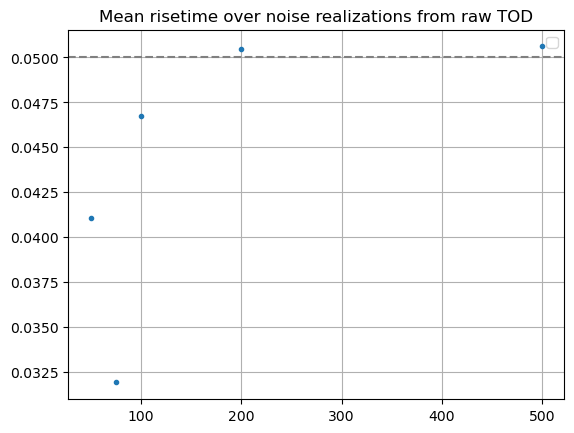

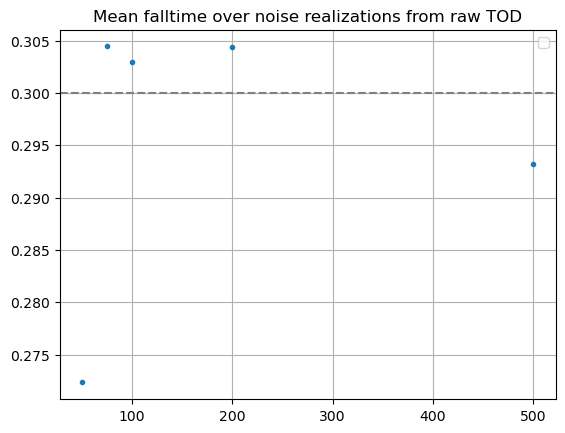

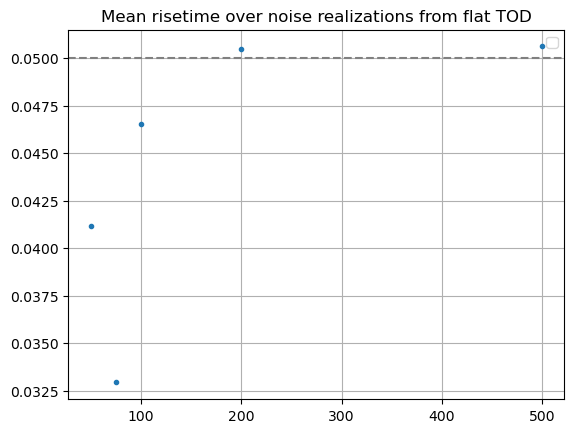

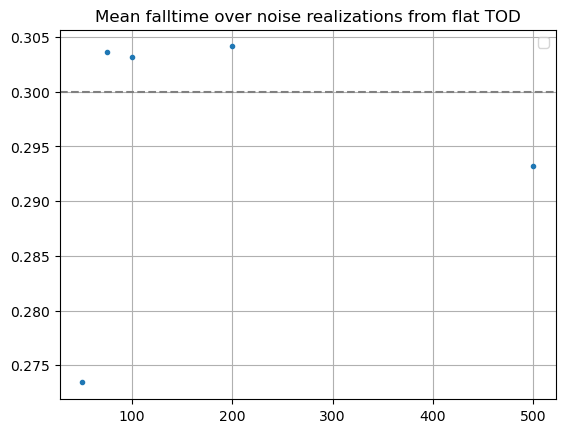

In [160]:
figure()
plot(nbins_array,np.mean(risetime,axis=0),'.')
axhline(risetime_par,linestyle='--',color='gray')
title('Mean risetime over noise realizations from raw TOD')
grid()
legend()
tight_layout


figure()
plot(nbins_array,np.mean(falltime,axis=0),'.')
axhline(falltime_par,linestyle='--',color='gray')
title('Mean falltime over noise realizations from raw TOD')
# xscale('log')
grid()
legend()
tight_layout

figure()
plot(nbins_array,np.mean(risetime_flat,axis=0),'.')
axhline(risetime_par,linestyle='--',color='gray')
title('Mean risetime over noise realizations from flat TOD')
grid()
legend()
tight_layout


figure()
plot(nbins_array,np.mean(falltime_flat,axis=0),'.')
axhline(falltime_par,linestyle='--',color='gray')
title('Mean falltime over noise realizations from flat TOD')
# xscale('log')
grid()
legend()
tight_layout